In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/results/*_center_*201908*.pearsonr.tsv')
print('\n'.join(map(os.path.basename,files)))

all_z_center_p1e-06_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-06_20190805_500PCs.pearsonr.tsv
all_z_center_p00001_20190805_500PCs.pearsonr.tsv
all_beta_center_p00001_20190805_100PCs.pearsonr.tsv
all_beta_center_p001_20190805_500PCs.pearsonr.tsv
all_z_center_p0001_20190805_100PCs.pearsonr.tsv
all_beta_center_p00001_20190805_500PCs.pearsonr.tsv
all_beta_center_p1e-06_20190805_100PCs.pearsonr.tsv
all_z_center_p0001_20190805_500PCs.pearsonr.tsv
all_beta_center_p0001_20190805_500PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_300PCs.pearsonr.tsv
all_beta_center_p00001_20190805_300PCs.pearsonr.tsv
all_z_center_p1e-06_20190805_500PCs.pearsonr.tsv
all_z_center_p1e-05_20190805_100PCs.pearsonr.tsv
all_z_center_p00001_20190805_300PCs.pearsonr.tsv
all_z_center_p00001_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_100PCs.pearsonr.tsv
all_beta_center_p001_20190805_100PCs.pearsonr.tsv
all_z_center_p001_20190805_100PCs.pearsonr.tsv
all_beta_center_p1e-05_20190805_500PCs.pearsonr.

In [3]:
kind='RESID'
datas = dict([(os.path.basename(f)[4:-13].replace('_20190805','').replace('_center','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [4]:
train=pd.DataFrame([datas[ds]['TRAIN_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T
train.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.000578,0.000025,0.061719,0.000137,0.000222,0.000122,0.000677,-8.554456e-07,0.000551,0.000125,...,0.000172,0.001598,0.000123,-0.000001,0.000052,8.281972e-05,0.014741,1.318152e-04,0.000221,0.056909
BIN10030510,0.000615,0.000007,0.070986,0.000049,0.000087,0.000054,0.000892,1.007944e-05,0.000516,0.000037,...,0.000156,0.001656,0.000006,0.000114,-0.000001,1.351691e-05,0.012195,1.046661e-04,0.000078,0.065718
BIN10030800,0.000042,0.000238,0.001023,0.000049,0.000423,0.000069,0.000586,3.191352e-04,0.000694,0.000076,...,0.000486,0.000198,-0.000002,0.000178,0.000090,4.741623e-04,0.000839,1.102655e-05,0.000355,0.001039
BIN10030820,0.001572,0.002249,0.003872,0.001444,0.001544,0.001461,0.001735,1.492782e-03,0.001301,0.001415,...,0.001716,0.001671,0.001440,0.001713,0.001789,1.427466e-03,0.001310,1.367289e-03,0.001497,0.001828
BIN1020483,-0.000004,NaN,0.038088,0.000001,-0.000004,0.000001,-0.000004,NaN,0.000055,0.000008,...,0.000035,0.009615,-0.000004,0.000002,NaN,-8.182936e-07,0.000805,-6.446507e-07,-0.000003,0.006593


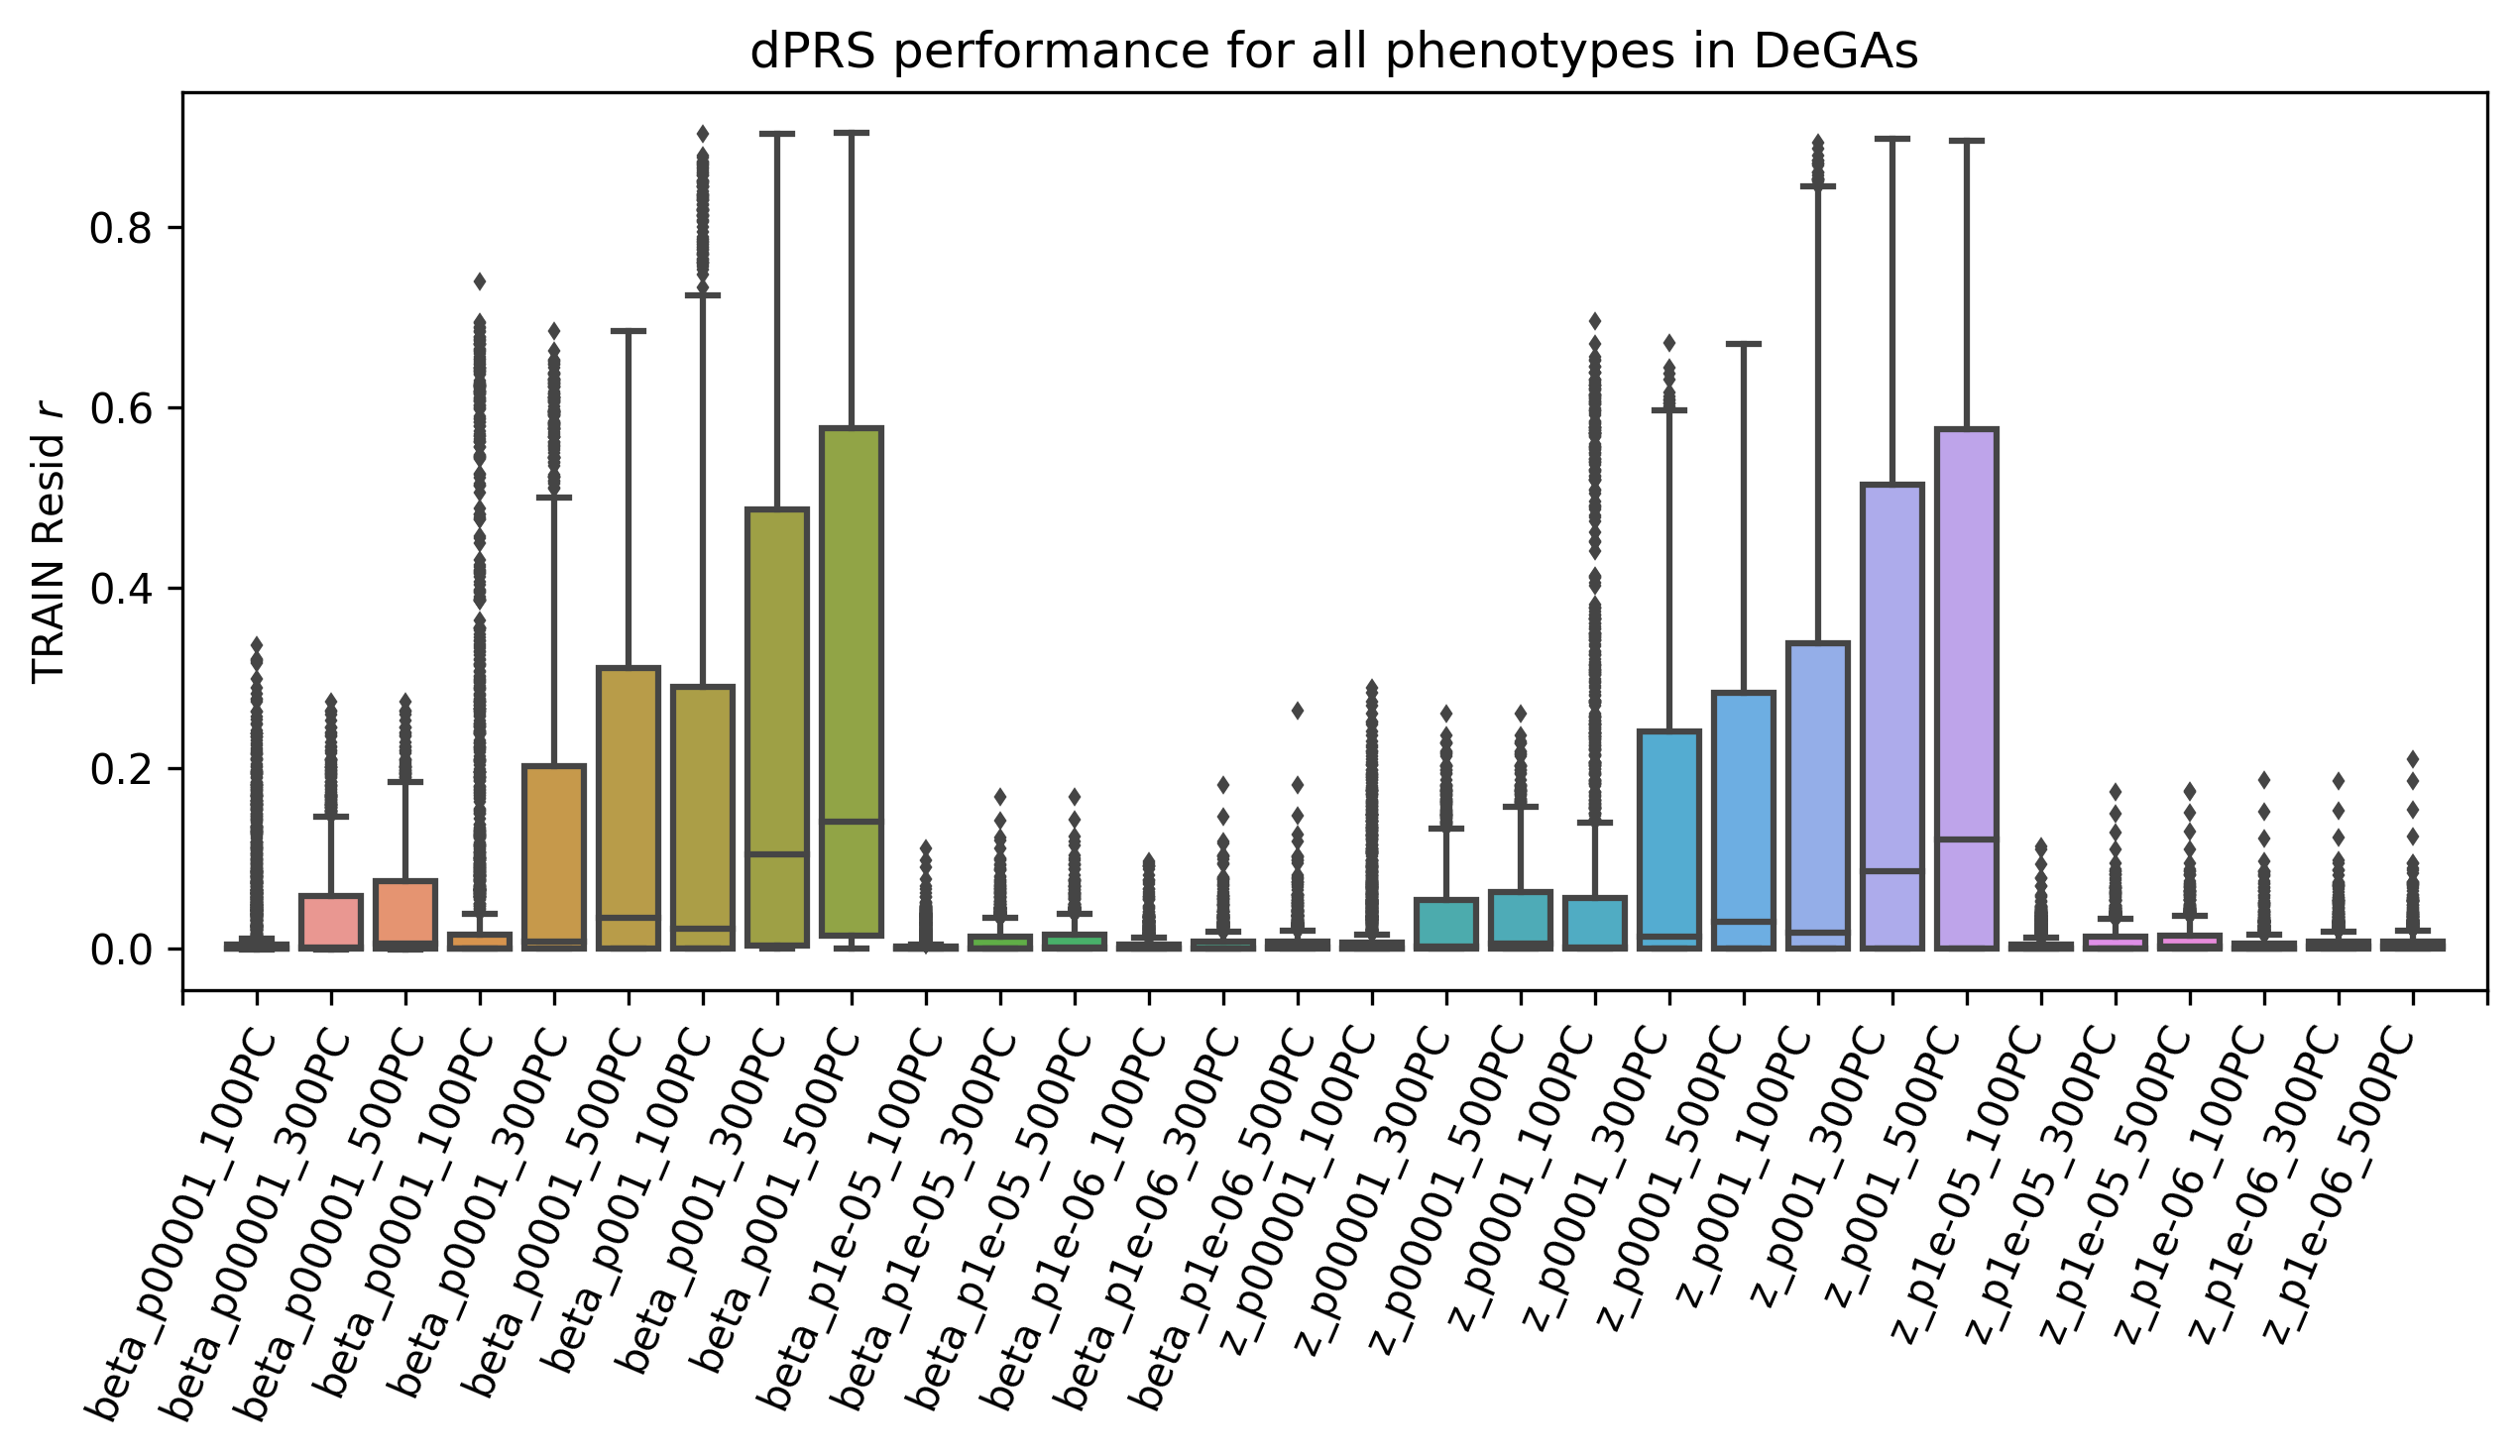

In [5]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [6]:
test=pd.DataFrame([datas[ds]['TEST_'+kind] for ds in datas], 
                 index=[ds for ds in datas]).T
test.head()

,beta_p0001_100PC,beta_p1e-06_500PC,beta_p001_500PC,z_p00001_100PC,z_p00001_500PC,z_p1e-05_500PC,beta_p0001_300PC,z_p1e-06_300PC,z_p001_100PC,z_p1e-05_300PC,...,beta_p00001_300PC,beta_p001_100PC,beta_p1e-05_100PC,beta_p1e-05_300PC,beta_p1e-06_300PC,z_p0001_300PC,z_p001_500PC,z_p1e-05_100PC,z_p00001_300PC,beta_p001_300PC
BIN10030500,0.000169,-0.000030,0.001205,-0.000009,0.000064,0.000013,0.000085,-0.000017,0.000196,0.000014,...,0.000145,0.000196,0.000033,0.000036,0.000048,0.000055,0.000385,0.000045,0.000059,0.001107
BIN10030510,0.000186,-0.000030,0.000959,-0.000022,-0.000013,-0.000009,0.000161,0.000078,0.000199,0.000035,...,0.000088,0.000110,-0.000030,0.000130,0.000347,0.000034,0.000248,0.000152,-0.000021,0.000920
BIN10030800,0.000015,0.000042,-0.000020,-0.000032,0.000052,-0.000027,0.000027,0.000034,0.000042,-0.000033,...,0.000085,-0.000030,-0.000007,0.000010,-0.000027,0.000023,0.000032,0.000192,0.000062,-0.000016
BIN10030820,0.001970,0.002449,0.002207,0.001831,0.002005,0.001773,0.002077,0.001831,0.001689,0.001768,...,0.002086,0.001924,0.001896,0.002112,0.002079,0.001867,0.001697,0.001745,0.001920,0.001940
BIN1020483,0.000024,NaN,0.000149,0.000029,-0.000028,-0.000027,0.000034,NaN,-0.000017,-0.000023,...,0.000033,0.000093,0.000026,-0.000029,NaN,-0.000021,-0.000030,0.000002,-0.000028,0.000068


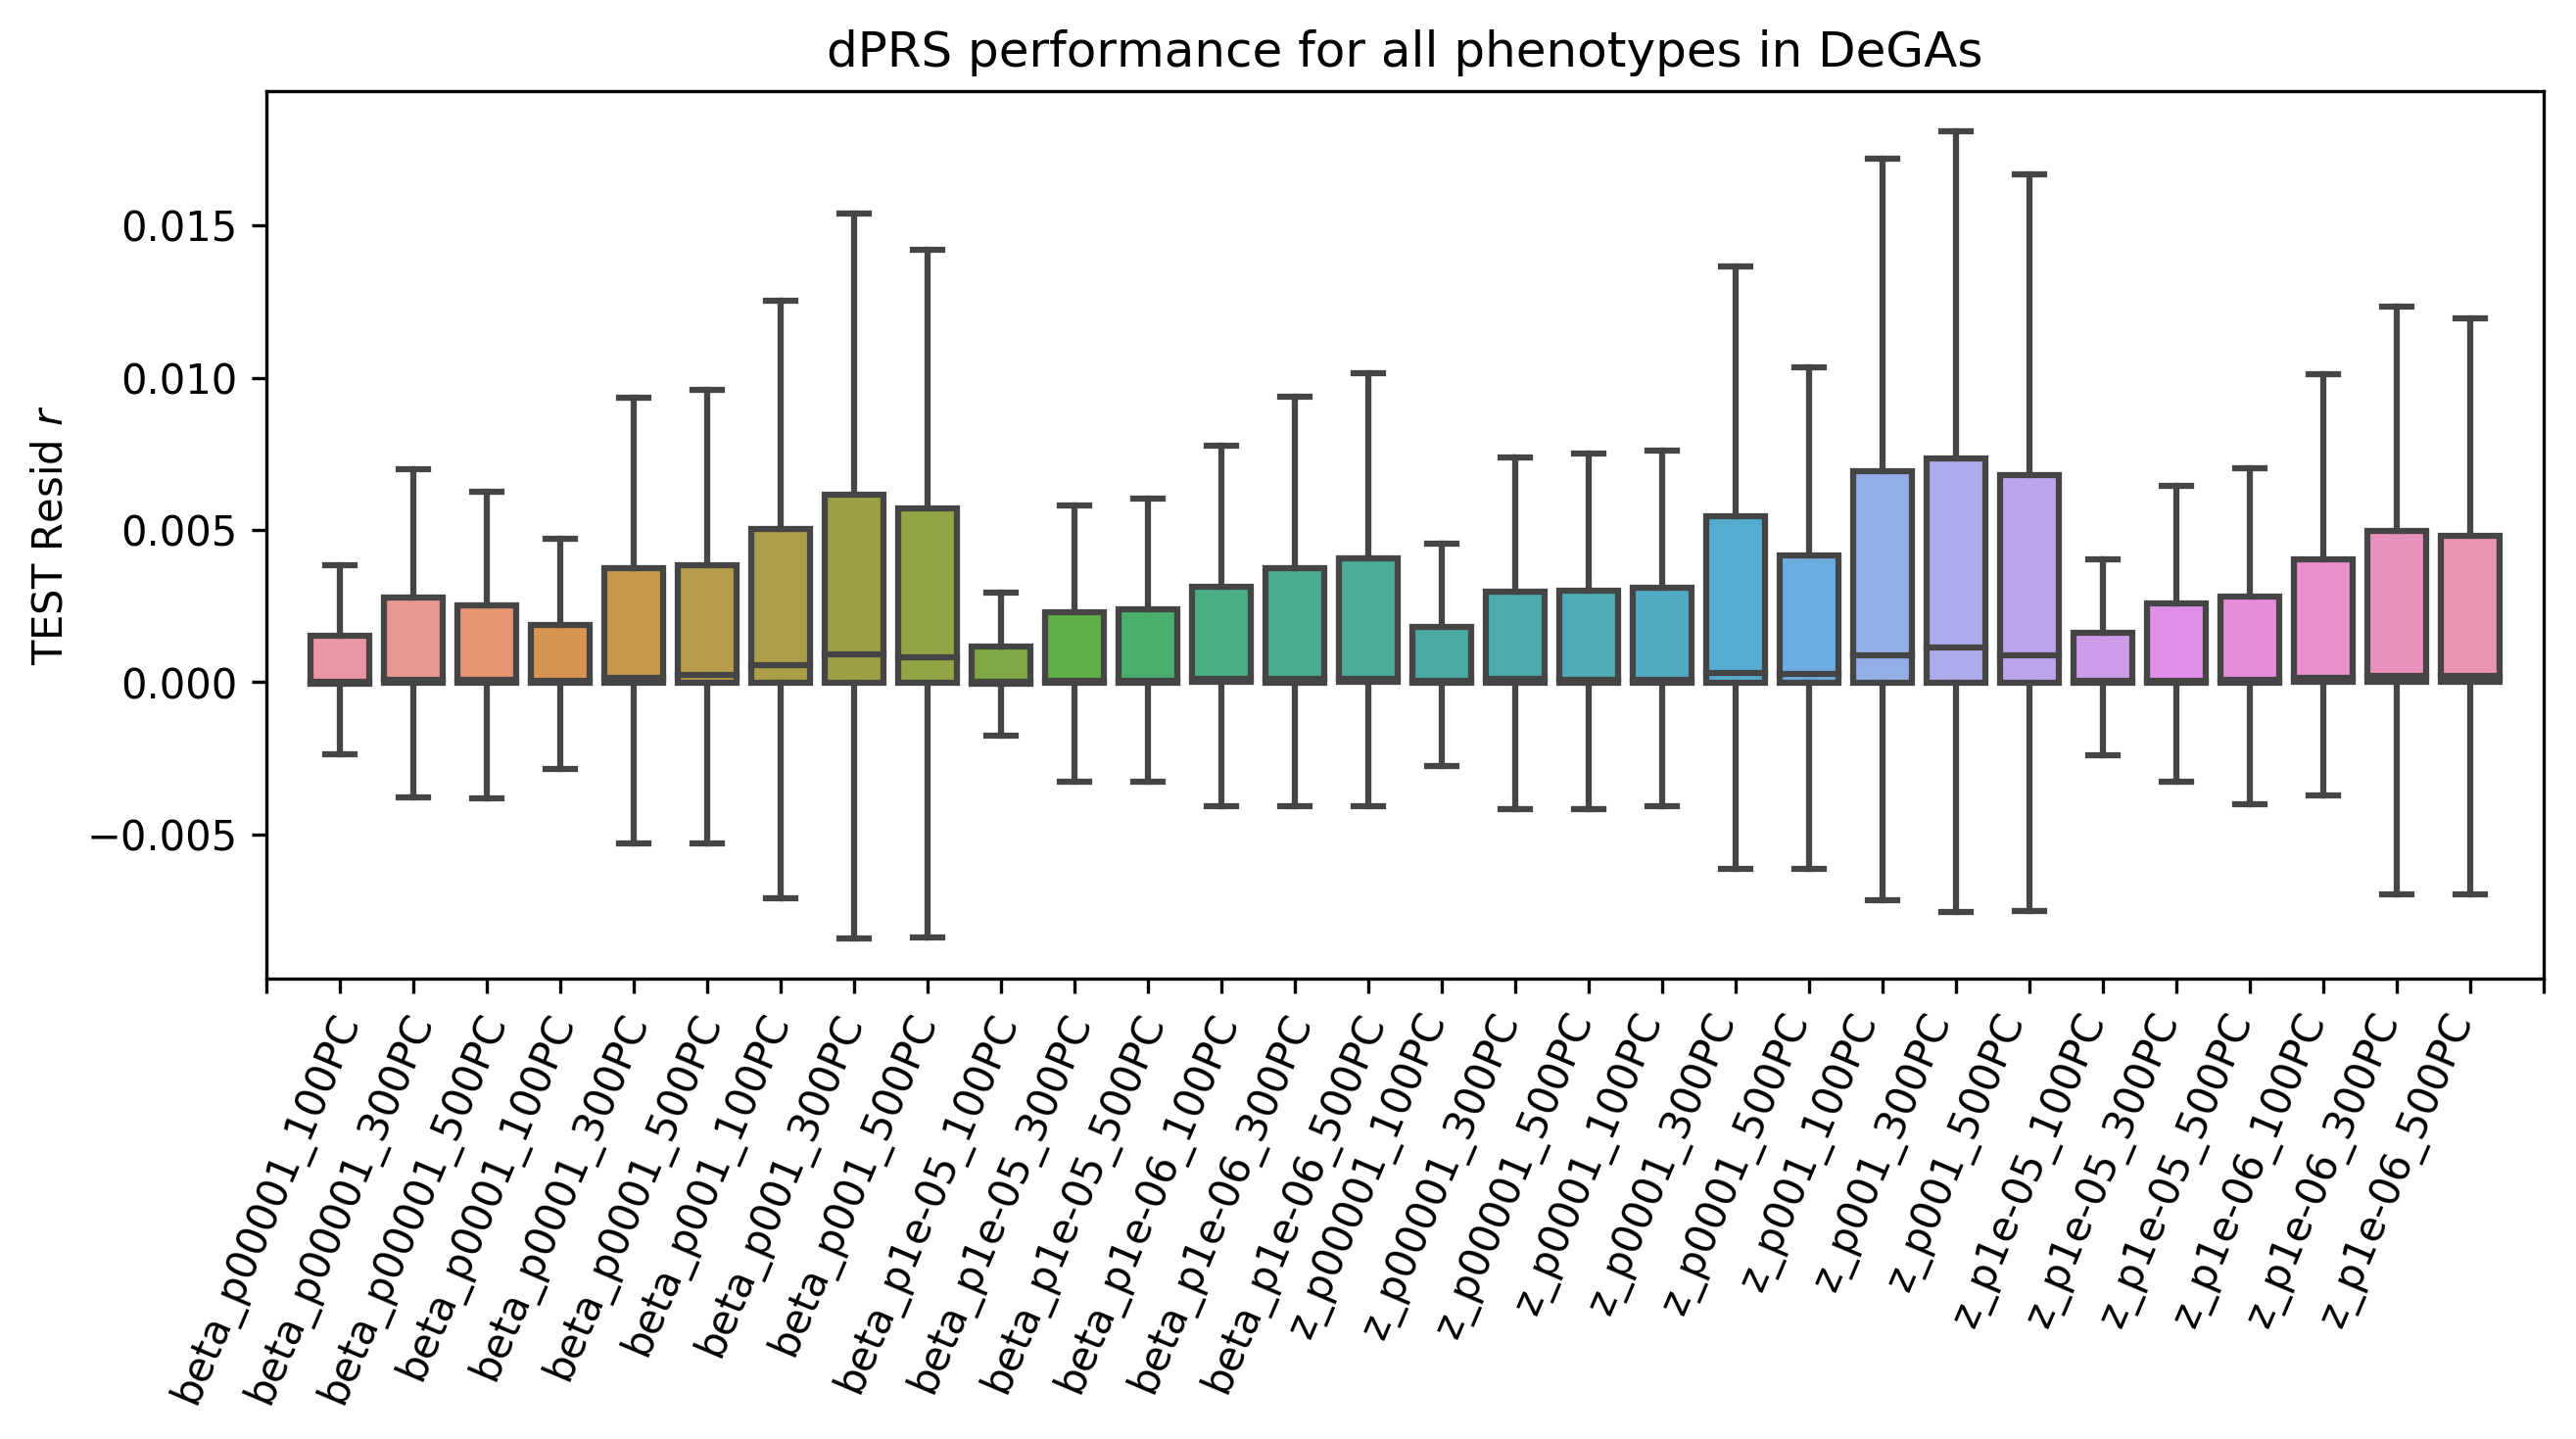

In [16]:
plt.figure(figsize=(10,4),dpi=300)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
           #fliersize=2)
            showfliers=0)
plt.xticks(list(range(-1,len(files)+1)), rotation=67), plt.xlabel('')
plt.ylabel(' '.join(['TEST',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')
plt.show()

In [8]:
test.mean().sort_values()[::-1]

z_p001_300PC         0.007101
z_p001_500PC         0.006837
z_p001_100PC         0.006727
beta_p001_300PC      0.006520
beta_p001_500PC      0.006375
z_p0001_300PC        0.006012
z_p1e-06_500PC       0.005767
beta_p001_100PC      0.005709
beta_p1e-06_500PC    0.005700
z_p1e-06_300PC       0.005640
z_p0001_500PC        0.005589
beta_p0001_300PC     0.005381
beta_p0001_500PC     0.005352
beta_p1e-06_300PC    0.005347
z_p0001_100PC        0.005062
z_p1e-06_100PC       0.005002
z_p00001_300PC       0.004978
beta_p00001_300PC    0.004864
z_p00001_500PC       0.004863
beta_p00001_500PC    0.004691
z_p1e-05_500PC       0.004569
beta_p1e-05_500PC    0.004417
z_p1e-05_300PC       0.004396
beta_p0001_100PC     0.004368
beta_p1e-06_100PC    0.004347
beta_p1e-05_300PC    0.004338
z_p00001_100PC       0.003949
beta_p00001_100PC    0.003658
z_p1e-05_100PC       0.003151
beta_p1e-05_100PC    0.002526
dtype: float64

In [9]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

/home/users/magu/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2400: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/users/magu/.local/lib/python2.7/site-packages/scipy/stats/morestats.py:2401: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


WilcoxonResult(statistic=682006.0, pvalue=1.4108673570544178e-32)

In [10]:
datas['z_p001_300PC'].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RESID,TEST_RESID
PHE,,
INI23296,0.897434,-0.003763
INI23281,0.887288,-0.002581
INI23200,0.886364,0.016115
INI23293,0.884671,-0.002544
INI23216,0.883733,-0.001563


In [11]:
datas['z_p001_300PC'].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RESID,TEST_RESID
PHE,,
INI50,0.220556,0.148216
INI10030840,0.180625,0.146879
INI20030660,0.180244,0.141274
INI30100,0.182356,0.139972
INI20030790,0.099386,0.090828


In [12]:
pd.DataFrame([datas[d].loc['INI21001',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RESID,TEST_RESID
beta_p001_100PC,0.171579,0.053563
beta_p001_500PC,0.153097,0.048761
z_p001_100PC,0.128316,0.048275
beta_p001_300PC,0.151432,0.047728
z_p001_500PC,0.123740,0.046504
z_p001_300PC,0.123303,0.046264
beta_p0001_100PC,0.087976,0.040440
z_p0001_100PC,0.066576,0.033387
beta_p0001_500PC,0.072027,0.031915
beta_p00001_100PC,0.054899,0.031631


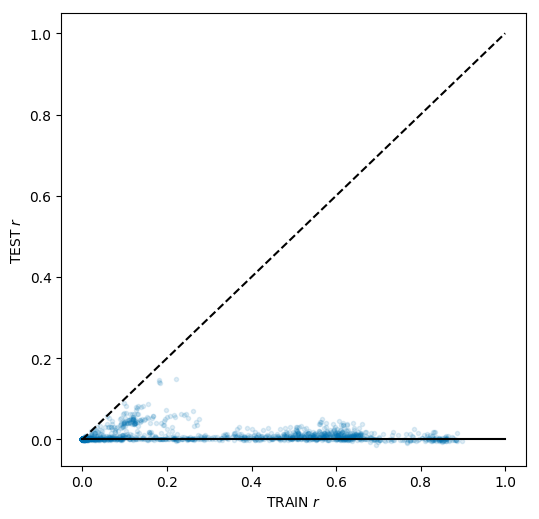

In [13]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas['z_p001_300PC']['TRAIN_'+kind], 
         datas['z_p001_300PC']['TEST_'+kind], '.', alpha=0.12)
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('TEST '+'$r$')
plt.show()

In [14]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/tsvd/*20190805*.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_beta_center_p1e-06_20190805_500PCs.npz
all_z_center_p00001_20190805_500PCs.npz
all_beta_center_p00001_20190805_500PCs.npz
all_beta_center_p001_20190805_500PCs.npz
all_z_center_p1e-06_20190805_500PCs.npz
all_z_center_p0001_20190805_500PCs.npz
all_z_center_p1e-05_20190805_500PCs.npz
all_beta_center_p1e-05_20190805_500PCs.npz
all_beta_center_p0001_20190805_500PCs.npz
all_z_center_p001_20190805_500PCs.npz


In [15]:
for npz in npzs:
    continue
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    # plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()